# Case Study on Correlation and Regression

### A textile company regularly spent money on five advertising companies for their ads. (Dataset added along with)

### 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

### 2. Build a regression model to predict the profit from the given data and comment your findings on it.

### 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

#### Add1(in Thousands):290;       Add2(in Thousands):312;       Add3(in Thousands):309;                                Add4(in Thousands):298; Add5(in Thousands):320

##### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Reading csv file into data

In [2]:
data=pd.read_csv("Add_sales_data_2018.csv")

##### Understanding data

In [3]:
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


##### Data has 1 dependent variable(target) and  6 independent variables (features)

In [4]:
data.shape

(205, 7)

In [5]:
data.dtypes

Date                     object
Add1(in Thousands)      float64
Add2(in Thousands)      float64
Add3(in Thousands)      float64
Add4(in Thousands)      float64
Add5(in Thousands)      float64
Profit(in Thousands)    float64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [7]:
data.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

##### Comment: There are no null values in the data

In [8]:
data.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


### 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated

##### Data is prepared using correlation and is plotted using heatmap. Numerical values are correlated with each other and indices are plotted using heat map

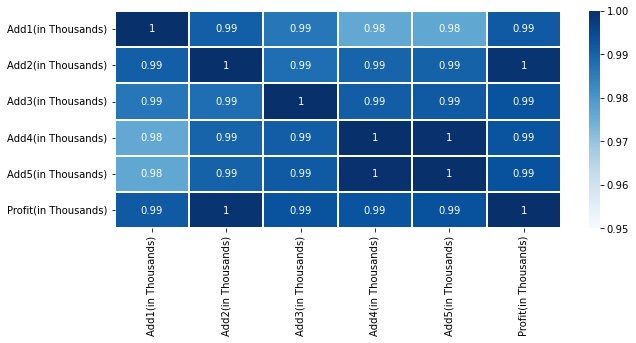

In [9]:
corrmatrix=data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,vmin=0.95,vmax=1,annot=True,linewidth=2,cmap='Blues');

#### Insights: It can be inferred by above correlation metric that the amount spent for advertising through five different companies have extremely high relationships with Profit generated

### 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [10]:
data.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

##### 'Date' column is not required for prediction hence ommiting that  for model

In [11]:
data1=data.drop(['Date'],axis=1)
data1

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,208.00,222.25,206.85,216.00,215.15,4093.065
1,217.00,218.60,205.90,210.25,209.20,4042.448
2,223.50,227.80,216.15,217.25,218.20,4213.819
3,230.00,237.50,225.75,226.45,227.60,4391.665
4,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...
200,288.00,288.25,279.20,284.50,284.30,5374.105
201,290.00,292.50,282.20,284.80,284.45,5439.655
202,298.60,298.60,286.65,287.45,287.80,5545.013
203,290.00,299.55,285.90,297.85,298.35,5565.444


##### Assigning inputs and outputs to variables x and y

In [12]:
y=data1['Profit(in Thousands)']
x=data1.drop(['Profit(in Thousands)'],axis=1)

In [13]:
x.shape

(205, 5)

##### Splitting data into test and train set for the model

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.15)

##### Creating an instance of linear regression as lr

In [15]:
lr=linear_model.LinearRegression()

##### Model is trained using xtrain and ytrain values using fit function

In [16]:
model=lr.fit(x_train,y_train)

##### Model is tested using xtest using predict function

In [17]:
predictions=model.predict(x_test)

##### Effeciency of a model can be tested using Mean Square value. Lower mean squared error, better is the model

In [18]:
print("MSE is: ",mean_squared_error(y_test,predictions))

MSE is:  3.735654379271738e-25


##### Coefficient of determination also called as R2 score is used to evaluate the performance of a linear regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s).Higher r2 value is 1 which implies model is highly efficient

##### Calculate R2 score for above case

In [19]:
r2 = r2_score(y_test,predictions)
print('r2 score for model is', r2)

r2 score for model is 1.0


#### Insights: Model created to pedict profits from input variables(amount spent on advertising) showed very low error(which was tested using MSE and r2 square). If we give values of amount that can be spend on advertising as inputs this model will predict how much profit can be made

### 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

#### Add1(in Thousands):290; Add2(in Thousands):312; Add3(in Thousands):309; Add4(in Thousands):298; Add5(in Thousands):320

##### Predicting profit with add values

In [20]:
make_pred=[[290,312,309,298,320]]
model.predict(make_pred).item()

5820.06

### Note: Above model is giving very low error. When we try to make model better by limited inputs values by considering correlations, it is giving only high errors. So all ad values are retained in making the model
